In [1]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected=True)

In [2]:
path = '/home/breno/proj/roraima-energy-social'

# Análise séries - Consumo Elétrico

# PROBLEMA
A série encontrada (na EPE) só tem o consumo elétrico a partir de 2004

In [53]:
df_index_roraima = pd.read_csv(path+'/RORAIMA/data/electricity_consumption_roraimaEPE.csv')

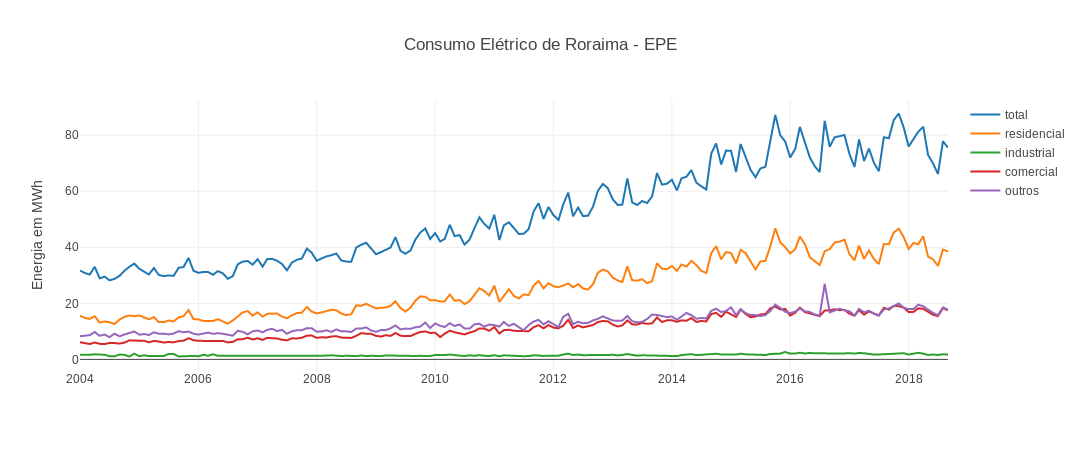

In [51]:
data = []
x = df_index_roraima['date']
for name in ['total','residencial','industrial','comercial','outros']:
    data.append(go.Scatter(x = x, y = df_index_roraima[name], name = name))
layout = go.Layout(title = 'Consumo Elétrico de Roraima - EPE', yaxis=dict(title = 'Energia em MWh'), xaxis =dict(type = 'date'))
fig = go.Figure(data = data, layout=layout)#df_index_roraima
pyo.iplot(fig)

In [5]:
df_index_north = pd.read_csv(path+'/NORTE/NORTH.csv', encoding='latin1',index_col=0)
df_index_brasil = pd.read_csv(path+'/BRASIL/brasil.csv', encoding='latin1',index_col=0)

### 1. Estudo consumo de eletricidade

In [15]:
list_names_consumption = ['comercial', 'residencial', 'industrial', 'other','total']

- Lendo dados NORTE

In [13]:
list_consumption = []
for i in np.arange(1407,1412,1):
    list_consumption.append(pd.read_csv(path+'/NORTE/data/'+str(i)+'.csv', index_col=0))

- Lendo dados BRASIL

In [16]:
list_consumption_brasil = []
for i in np.arange(1402,1407,1):
    list_consumption_brasil.append(pd.read_csv(path+'/BRASIL/data/'+str(i)+'.csv', index_col=0))

- Criando dataFrames unificados para Brasil e Norte

In [25]:
# Norte
df_consumption = pd.DataFrame()
df_consumption['date'] = list_consumption[0]['date']
for i in range(len(list_consumption)):
    df_consumption[list_names_consumption[i]] = list_consumption[i]['value']
    
df_consumption['date'] = pd.DatetimeIndex(df_consumption['date'])

# Brasil
df_br_consumption = pd.DataFrame()
df_br_consumption['date'] = list_consumption_brasil[0]['date']
for i in range(len(list_consumption_brasil)):
    df_br_consumption[list_names_consumption[i]] = list_consumption_brasil[i]['value']
    
df_br_consumption['date'] = pd.DatetimeIndex(df_consumption['date'])

## NORTE - Plots

- Generating plot (absolute values)

In [36]:
data = []
x = df_consumption['date']
for i in list_names_consumption:
    trace = go.Scatter(x = x, y = df_consumption[i], name = i)
    data.append(trace)
layout = go.Layout(title = 'Consumo Elétrico Região Norte - Eletrobrás',
                   yaxis = dict(title = 'Energia em GWh'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename=path+'ConsumoNorteAbsoluto.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-socialConsumoNorteAbsoluto.html'

- Generating plot (relative values)

In [29]:
temp_df = df_consumption.copy()
for i in list_names_consumption[:-1]:
    temp_df[i] = 100*temp_df[i]/temp_df['total']

data = []
x = temp_df['date']
for i in list_names_consumption[:-1]:
    trace = go.Scatter(x = x, y = temp_df[i], name = i)
    data.append(trace)
layout = go.Layout(title = 'Consumo Elétrico Região Norte - Eletrobrás',
                   yaxis = dict(title = '% do consumo elétrico total'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename='ConsumoNorteRelativo.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-social/Análises/ConsumoNorteRelativo.html'

- Generating plot ($\Delta$ values) - Mensal

In [41]:
temp_df = df_consumption.copy()
for i in list_names_consumption:
    temp_df[i] = 100*temp_df[i]/sum(temp_df[i])

temp_df = temp_df.reset_index()
for name in list_names_consumption:
    temp_df[name] = [0]+[temp_df[name][i]-temp_df[name][i-1] for i in range(1,len(temp_df['comercial']))]
    
data = []
x = temp_df['date']
for i in list_names_consumption:
    trace = go.Scatter(x = x, y = temp_df[i], name = i)
    data.append(trace)
layout = go.Layout(title = 'Consumo Elétrico Região Norte - Eletrobrás',
                   yaxis = dict(title = 'Delta % do consumo elétrico'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename='ConsumoNorteDeltaMensal.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-social/Análises/ConsumoNorteDeltaMensal.html'

- Generating plot ($\Delta$ values) - Anual

In [43]:
temp_df = df_consumption.copy()
temp_df['year'] = temp_df['date'].dt.year
temp_df = temp_df.groupby('year').mean()

for i in list_names_consumption:
    temp_df[i] = 100*temp_df[i]/sum(temp_df[i])

temp_df = temp_df.reset_index()
for name in list_names_consumption:
    temp_df[name] = [0]+[temp_df[name][i]-temp_df[name][i-1] for i in range(1,len(temp_df['comercial']))]
    
data = []
x = temp_df['year']
for i in list_names_consumption:
    trace = go.Scatter(x = x, y = temp_df[i], name = i)
    data.append(trace)
layout = go.Layout(title = 'Consumo Elétrico Região Norte - Eletrobrás',
                   yaxis = dict(title = 'Delta % do consumo elétrico'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename='ConsumoNorteDeltaAnual.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-social/Análises/ConsumoNorteDeltaAnual.html'

## BRASIL - Plots

- Generating plot (absolute values)

In [53]:
data = []
x = df_br_consumption['date']
for i in list_names_consumption:
    trace = go.Scatter(x = x, y = df_br_consumption[i], name = i)
    data.append(trace)
layout = go.Layout(title = 'Consumo Elétrico Brasil - Eletrobrás',
                   yaxis = dict(title = 'Energia em GWh'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename='ConsumoBrasilAbsoluto.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-social/Análises/ConsumoBrasilAbsoluto.html'

- Generating plot (relative values)

In [38]:
temp_df = df_br_consumption.copy()
for i in list_names_consumption[:-1]:
    temp_df[i] = 100*temp_df[i]/temp_df['total']

data = []
x = temp_df['date']
for i in list_names_consumption[:-1]:
    trace = go.Scatter(x = x, y = temp_df[i], name = i)
    data.append(trace)
layout = go.Layout(title = 'Consumo Elétrico Brasil - Eletrobrás',
                   yaxis = dict(title = '% do consumo elétrico total'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename='/ConsumoBrasilRelativo.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-social/Análises/ConsumoBrasilRelativo.html'

- Generating plot ($\Delta$ values) - Mensal

In [40]:
temp_df = df_br_consumption.copy()
for i in list_names_consumption:
    temp_df[i] = 100*temp_df[i]/sum(temp_df[i])

temp_df = temp_df.reset_index()
for name in list_names_consumption:
    temp_df[name] = [0]+[temp_df[name][i]-temp_df[name][i-1] for i in range(1,len(temp_df['comercial']))]
    
data = []
x = temp_df['date']
for i in list_names_consumption:
    trace = go.Scatter(x = x, y = temp_df[i], name = i)
    data.append(trace)
layout = go.Layout(title = 'Consumo Elétrico Brasil - Eletrobrás',
                   yaxis = dict(title = 'Delta % do consumo elétrico'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename='ConsumoBrasilDeltaMensal.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-social/Análises/ConsumoBrasilDeltaMensal.html'

- Generating plot ($\Delta$ values) - Anual

In [44]:
temp_df = df_br_consumption.copy()
temp_df['year'] = temp_df['date'].dt.year
temp_df = temp_df.groupby('year').mean()

for i in list_names_consumption:
    temp_df[i] = 100*temp_df[i]/sum(temp_df[i])

temp_df = temp_df.reset_index()
for name in list_names_consumption:
    temp_df[name] = [0]+[temp_df[name][i]-temp_df[name][i-1] for i in range(1,len(temp_df['comercial']))]
    
data = []
x = temp_df['year']
for i in list_names_consumption:
    trace = go.Scatter(x = x, y = temp_df[i], name = i)
    data.append(trace)
layout = go.Layout(title = 'Consumo Elétrico Brasil - Eletrobrás',
                   yaxis = dict(title = 'Delta % do consumo elétrico'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename='ConsumoBrasilDeltaAnual.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-social/Análises/ConsumoBrasilDeltaAnual.html'

# Comparação séries

## $\Delta$

In [52]:
# Brasil
temp_df = df_br_consumption.copy()
temp_df['year'] = temp_df['date'].dt.year
temp_df = temp_df.groupby('year').mean()

for i in list_names_consumption:
    temp_df[i+'_brasil'] = 100*temp_df[i]/sum(temp_df[i])

temp_df1 = temp_df.reset_index()
for name in list_names_consumption:
    temp_df1[name+'_brasil'] = [0]+[temp_df1[name+'_brasil'][i]-temp_df1[name+'_brasil'][i-1] for i in range(1,len(temp_df1['comercial']))]
    
#Norte
temp_df = df_consumption.copy()
temp_df['year'] = temp_df['date'].dt.year
temp_df = temp_df.groupby('year').mean()

for i in list_names_consumption:
    temp_df[i+'_norte'] = 100*temp_df[i]/sum(temp_df[i])

temp_df2 = temp_df.reset_index()
for name in list_names_consumption:
    temp_df2[name+'_norte'] = [0]+[temp_df2[name+'_norte'][i]-temp_df2[name+'_norte'][i-1] for i in range(1,len(temp_df2[name]))]
    
    
    

# Plot config
data = []
for i_raw in list_names_consumption:
    i = i_raw+'_brasil'
    x = temp_df1['year']
    trace = go.Scatter(x = x, y = temp_df1[i], name = i)
    data.append(trace)
    
for i_raw in list_names_consumption:
    i = i_raw+'_norte'
    x = temp_df2['year']
    trace = go.Scatter(x = x, y = temp_df2[i], name = i)
    data.append(trace)
    
layout = go.Layout(title = 'Consumo Elétrico Comparação - Eletrobrás',
                   yaxis = dict(title = 'Delta % do consumo elétrico'),
                   xaxis = dict(type = 'date'))
fig = go.Figure(data=data, layout= layout)
pyo.plot(fig, filename='ConsumoComparadoDeltaAnual.html', config=dict(showLink = False))

'file:///home/breno/proj/roraima-energy-social/Análises/ConsumoComparadoDeltaAnual.html'